In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pufferfish import *
from empirical_data import *

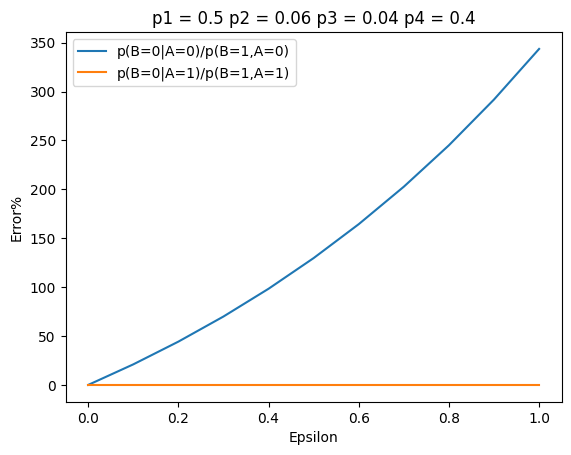

In [2]:
# Generate theoretical errors

# Point-wise correlation between attributes

p1 = 0.5
p2 = 0.06
p3 = 0.04
p4 = 0.4

def prob_B_0_div_B_1_given_A_0(epsilon, p1, p3):
    return (np.exp(epsilon)+p1-1)/p3

def prob_B_0_div_B_1_given_A_1(epsilon, p2, p4):
    return p2/p4

epsilon = np.array(np.arange(11))*0.1

plt.plot(epsilon, [abs(p1/p3 - prob_B_0_div_B_1_given_A_0(i, p1, p3))* 100/(p1/p3) for i in epsilon])
plt.plot(epsilon, [abs(p2/p4 - prob_B_0_div_B_1_given_A_1(i, p2, p4))* 100/(p2/p4) for i in epsilon])
plt.legend(["p(B=0|A=0)/p(B=1,A=0)", "p(B=0|A=1)/p(B=1,A=1)"], loc ="upper left")
plt.xlabel("Epsilon")
plt.ylabel("Error%")
plt.title("p1 = 0.5 p2 = 0.06 p3 = 0.04 p4 = 0.4")
plt.show()

In [3]:
FILE_LOCATION = "/home/sjay9734/diff_encoder/face_privacy/face-privacy-diffae/datasets/celeba_anno/list_attr_celeba.txt"
TRAINING_AMOUNT = 0.5

ATTR_X = "Bald"
ATTR_Y = "Male"

dict_attr_node = {}

xn_train = []
yn_train = []

xn_test = []
yn_test = []

# Reading txt
with open(FILE_LOCATION, 'r') as txt_file:
    no_of_lines = txt_file.readline()
    fields = txt_file.readline()

    for i, attr in enumerate(fields.split()):
      dict_attr_node[attr] = i
    print(dict_attr_node)
    # Training dataset
    for i in range(int(int(no_of_lines) * TRAINING_AMOUNT)):
      rows = txt_file.readline().split()
      xn_train.append(rows[dict_attr_node[ATTR_X]])
      yn_train.append(rows[dict_attr_node[ATTR_Y]])
    
    # Test dataset
    for i in range(int(int(no_of_lines) * TRAINING_AMOUNT),int(no_of_lines)):
      rows = txt_file.readline().split()
      xn_test.append(rows[dict_attr_node[ATTR_X]])
      yn_test.append(rows[dict_attr_node[ATTR_Y]])


{'5_o_Clock_Shadow': 0, 'Arched_Eyebrows': 1, 'Attractive': 2, 'Bags_Under_Eyes': 3, 'Bald': 4, 'Bangs': 5, 'Big_Lips': 6, 'Big_Nose': 7, 'Black_Hair': 8, 'Blond_Hair': 9, 'Blurry': 10, 'Brown_Hair': 11, 'Bushy_Eyebrows': 12, 'Chubby': 13, 'Double_Chin': 14, 'Eyeglasses': 15, 'Goatee': 16, 'Gray_Hair': 17, 'Heavy_Makeup': 18, 'High_Cheekbones': 19, 'Male': 20, 'Mouth_Slightly_Open': 21, 'Mustache': 22, 'Narrow_Eyes': 23, 'No_Beard': 24, 'Oval_Face': 25, 'Pale_Skin': 26, 'Pointy_Nose': 27, 'Receding_Hairline': 28, 'Rosy_Cheeks': 29, 'Sideburns': 30, 'Smiling': 31, 'Straight_Hair': 32, 'Wavy_Hair': 33, 'Wearing_Earrings': 34, 'Wearing_Hat': 35, 'Wearing_Lipstick': 36, 'Wearing_Necklace': 37, 'Wearing_Necktie': 38, 'Young': 39}


In [14]:
matrix_symb, symbols_xn, symbols_yn, joint_prob_matrix = joint_prob_binary(xn_train, yn_train)
print(matrix_symb, symbols_xn, symbols_yn, joint_prob_matrix)

matrix_symb_dict = {}
for i,symb in enumerate(matrix_symb):
    matrix_symb_dict[symb] = i
    
#Pufferfish mechanism initialize
p_m = Pufferfish_Binary_Attr(joint_prob_matrix.flatten(), matrix_symb)

["['-1' '-1']", "['1' '-1']", "['-1' '1']", "['1' '1']"] [['-1']
 ['1']] [['-1']
 ['1']] [[0.4512779  0.09703946]
 [0.34571911 0.10596353]]


In [10]:
for i in range(4):
    print(p_m.gen_random_output(1,10, out_index_ = True))

[1]
[1]
[1]
[1]


In [28]:
# Analyze the test dataset

EPS = 0.001

perturbed_output = []
original_dataset = []

for i in range(len(xn_test)):
    symb_index = matrix_symb_dict[f"['{xn_test[i]}' '{yn_test[i]}']"]
    original_dataset.append(symb_index)
[symbols_original, counts_original] = np.unique(original_dataset, axis=0, return_counts=True)
joint_matrix_original  = counts_original/len(xn_test)
print(joint_matrix_original)

eps_arr = np.arange(100)*0.1

for eps in eps_arr:
    for i in range(len(xn_test)):
        symb_index = matrix_symb_dict[f"['{xn_test[i]}' '{yn_test[i]}']"]
        perturbed_output.append(p_m.gen_random_output(symb_index, eps, out_index_ = True)[0])
    [symbols_perturbed, counts_perturbed] = np.unique(perturbed_output, axis=0, return_counts=True)

    joint_matrix_perturbed = counts_perturbed/len(xn_test)


print(joint_matrix_perturbed)
print(joint_matrix_original)

[0.44987167 0.09781836 0.34740375 0.10490622]
[0.44496545 0.0966535  0.34889437 0.10948667]
